# 1. Problem Statement - Problem Unerstanding:
BUild a model to predict whether the client subscribes a term deposit or not Binomial ("yes" or "no")

# 1. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# 2. Import Dataset

In [2]:
bank_data = pd.read_csv('bank-full.csv',delimiter=';')

# 3. Exploratory Data Analysis

## 3.1 Initial Analysis

In [3]:
bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

#### out of 16 predictors, 9 predictors are of categorical type.

In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### No null values are present in the data.

In [7]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## 3.2 Data Preparation

In [9]:
bank_data = pd.get_dummies(bank_data, columns = ['job','marital','education','default','housing','loan','contact','month','poutcome'])

In [10]:
bank_data.shape

(45211, 52)

In [11]:
bank_data.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [12]:
bank_data.dtypes

age                     int64
balance                 int64
day                     int64
duration                int64
campaign                int64
pdays                   int64
previous                int64
y                      object
job_admin.              uint8
job_blue-collar         uint8
job_entrepreneur        uint8
job_housemaid           uint8
job_management          uint8
job_retired             uint8
job_self-employed       uint8
job_services            uint8
job_student             uint8
job_technician          uint8
job_unemployed          uint8
job_unknown             uint8
marital_divorced        uint8
marital_married         uint8
marital_single          uint8
education_primary       uint8
education_secondary     uint8
education_tertiary      uint8
education_unknown       uint8
default_no              uint8
default_yes             uint8
housing_no              uint8
housing_yes             uint8
loan_no                 uint8
loan_yes                uint8
contact_ce

In [13]:
X = bank_data.drop(['y'],axis=1)
y = bank_data[['y']]

In [14]:
X.shape,y.shape

((45211, 51), (45211, 1))

# 4. Model Building

In [16]:
lr = LogisticRegression()

In [15]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=10)

# 5. Model Training

In [17]:
model_1 = lr.fit(X_train, y_train)

# 6. Model Testing

In [18]:
y_test_predict = model_1.predict(X_test).reshape(-1,1)
y_train_predict = model_1.predict(X_train).reshape(-1,1)

In [19]:
y_test_predict.shape,y_train_predict.shape

((9043, 1), (36168, 1))

# 7. Model Evaluation

In [20]:
print(confusion_matrix(y_train,y_train_predict))

[[31279   649]
 [ 3307   933]]


In [21]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94     31928
         yes       0.59      0.22      0.32      4240

    accuracy                           0.89     36168
   macro avg       0.75      0.60      0.63     36168
weighted avg       0.87      0.89      0.87     36168



In [22]:
print(confusion_matrix(y_test,y_test_predict))

[[7815  179]
 [ 796  253]]


In [23]:
print('accuracy score for training data is ',accuracy_score(y_train,y_train_predict))
print('accuracy score for testing data is ',accuracy_score(y_test,y_test_predict))

accuracy score for training data is  0.8906215439062154
accuracy score for testing data is  0.8921817980758597


In [24]:
print('confusion matrix for training data is \n',confusion_matrix(y_train, y_train_predict))
print('confusion matrix for testing data is \n',confusion_matrix(y_test, y_test_predict))

confusion matrix for training data is 
 [[31279   649]
 [ 3307   933]]
confusion matrix for testing data is 
 [[7815  179]
 [ 796  253]]


In [25]:
print('classification report for training data is \n',classification_report(y_train, y_train_predict))
print('classification report for testing data is \n',classification_report(y_test, y_test_predict))


classification report for training data is 
               precision    recall  f1-score   support

          no       0.90      0.98      0.94     31928
         yes       0.59      0.22      0.32      4240

    accuracy                           0.89     36168
   macro avg       0.75      0.60      0.63     36168
weighted avg       0.87      0.89      0.87     36168

classification report for testing data is 
               precision    recall  f1-score   support

          no       0.91      0.98      0.94      7994
         yes       0.59      0.24      0.34      1049

    accuracy                           0.89      9043
   macro avg       0.75      0.61      0.64      9043
weighted avg       0.87      0.89      0.87      9043



#### Here, though accuracy comes out to be 89% but there is large difference between precision at 1 and recall at 1.
### So, this model is not good.

# Check whether the data is balanced?

In [26]:
bank_data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [27]:
print('{}% of the total people have subscribed.'.format(round((5289/(39922+5289))*100,4)))
print('{}% of the total people have not subscribed.'.format(round((39922/(39922+5289))*100,4)))

11.6985% of the total people have subscribed.
88.3015% of the total people have not subscribed.


### The data is imbalanced, which is causing the model to give bad performance .

# Trating Imbalanced data

#### SMOTE (Synthetic Minority Oversampling Technique) – Oversampling
* It aims to balance class distribution by randomly increasing minority class examples by replicating them.
* After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
balanced_data = SMOTE(random_state=0)

In [31]:
X = bank_data.drop(['y'],axis=1)
y = bank_data[['y']]

In [32]:
X.shape,y.shape #original shape of dataset

((45211, 51), (45211, 1))

In [33]:
X_b,y_b = balanced_data.fit_sample(X,y)

In [34]:
X_b.shape,y_b.shape #shape of dataset after treating imbalanced data.

((79844, 51), (79844, 1))

# Model Training

In [35]:
Xb_train, Xb_test,yb_train,yb_test = train_test_split(X_b,y_b,test_size=0.20,random_state=10)

In [36]:
model_2 = lr.fit(Xb_train, yb_train)

# Model Testing

In [37]:
yb_test_predict = model_2.predict(Xb_test).reshape(-1,1)
yb_train_predict = model_2.predict(Xb_train).reshape(-1,1)

In [38]:
yb_test_predict.shape,yb_train_predict.shape

((15969, 1), (63875, 1))

# Model Evaluation

In [39]:
print('accuracy score for training data is ',accuracy_score(yb_train,yb_train_predict))
print('accuracy score for testing data is ',accuracy_score(yb_test,yb_test_predict))

accuracy score for training data is  0.8881095890410959
accuracy score for testing data is  0.8911015091740246


In [40]:
print('confusion matrix for training data is \n',confusion_matrix(yb_train, yb_train_predict))
print('confusion matrix for testing data is \n',confusion_matrix(yb_test, yb_test_predict))

confusion matrix for training data is 
 [[28514  3454]
 [ 3693 28214]]
confusion matrix for testing data is 
 [[7122  832]
 [ 907 7108]]


In [41]:
print('classification report for training data is \n',classification_report(yb_train, yb_train_predict))
print('classification report for testing data is \n',classification_report(yb_test, yb_test_predict))

classification report for training data is 
               precision    recall  f1-score   support

          no       0.89      0.89      0.89     31968
         yes       0.89      0.88      0.89     31907

    accuracy                           0.89     63875
   macro avg       0.89      0.89      0.89     63875
weighted avg       0.89      0.89      0.89     63875

classification report for testing data is 
               precision    recall  f1-score   support

          no       0.89      0.90      0.89      7954
         yes       0.90      0.89      0.89      8015

    accuracy                           0.89     15969
   macro avg       0.89      0.89      0.89     15969
weighted avg       0.89      0.89      0.89     15969



## roc,auc for training data

In [48]:
probs1 = model_2.predict_proba(Xb_train)
probs1 = probs1[:,1]

In [49]:
yb_train_ = LabelEncoder().fit_transform(yb_train)
yb_train_

array([0, 1, 0, ..., 0, 0, 1])

area unser curve is 0.95


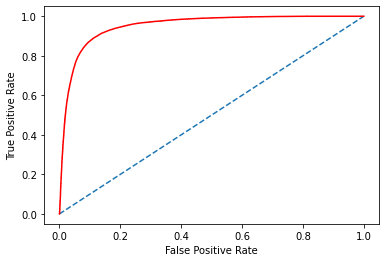

In [51]:
auc = roc_auc_score(yb_train_,probs1).round(2)
print('area unser curve is',auc)

fpr,tpr,threshhold = roc_curve(yb_train_,probs1)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,color='red')
plt.xlabel('False Positive Rate') #False Positive Rate = 1 - True Positive Rate
plt.ylabel('True Positive Rate')
plt.show()

## roc,auc for test data

In [42]:
y.shape,model_2.predict(X_b).shape

((45211, 1), (79844,))

In [43]:
model_2.predict_proba(X_b).shape

(79844, 2)

In [44]:
model_2_predict_X = model_2.predict_proba(X).reshape(-1,1)
model_2_predict_X.shape

(90422, 1)

In [45]:
probs = model_2.predict_proba(Xb_test)
probs = probs[:,1]

In [46]:
yb_test_ = LabelEncoder().fit_transform(yb_test)
yb_test_

array([1, 1, 0, ..., 1, 0, 0])

area unser curve is 0.95


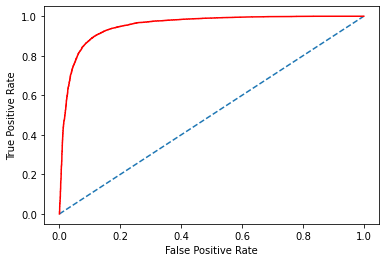

In [47]:
auc = roc_auc_score(yb_test,probs).round(2)
print('area unser curve is',auc)

fpr,tpr,threshhold = roc_curve(yb_test_,probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,color='red')
plt.xlabel('False Positive Rate') #False Positive Rate = 1 - True Positive Rate
plt.ylabel('True Positive Rate')
plt.show()

# CONCLUSION
### model_2 is the best logistic regression model which is obtained after treating the imabalanced dataset.
* Here, the accuracy of model is 89%, and also, the difference between precision and recall is very less as compared to model_1¶